# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#imperial reign of terror
temp_units = "imperial"

# query url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="


# set up Dataframe
city_name = []
cloudiness = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []
country = []

# set count quantities
count_one = 0
set_one = 1

# fruit loops
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_name.append(city)
        else:
            count_one += 1
            city_name.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City data not found. Pass")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | goderich
Processing Record 3 of Set 1 | port hardy
Processing Record 4 of Set 1 | manzhouli
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | souillac
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | sao filipe
Processing Record 11 of Set 1 | inverell
Processing Record 12 of Set 1 | dicabisagan
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | qasigiannguit
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | gunupur
Processing Record 18 of Set 1 | bon air
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | luangwa
Processing Record 21 of Set 1 | antas
Processing Record 22 of Set 1 | east london
Processing Record 23 of Set 1 | carnarvon
Processing Record 24 of Set 1 | saint-louis
Processin

City data not found. Pass
Processing Record 41 of Set 4 | saint-pierre
Processing Record 42 of Set 4 | aneho
Processing Record 43 of Set 4 | rabaul
Processing Record 44 of Set 4 | sangar
Processing Record 45 of Set 4 | bethel
Processing Record 46 of Set 4 | saint-joseph
Processing Record 47 of Set 4 | villerupt
Processing Record 48 of Set 4 | kodiak
Processing Record 49 of Set 4 | hirara
Processing Record 1 of Set 5 | airai
City data not found. Pass
Processing Record 2 of Set 5 | mar del plata
Processing Record 3 of Set 5 | tubuala
Processing Record 4 of Set 5 | preobrazheniye
Processing Record 5 of Set 5 | singkawang
Processing Record 6 of Set 5 | masallatah
Processing Record 7 of Set 5 | kapaa
Processing Record 8 of Set 5 | ketchikan
Processing Record 9 of Set 5 | puerto escondido
Processing Record 10 of Set 5 | sitka
Processing Record 11 of Set 5 | ranong
Processing Record 12 of Set 5 | mount gambier
Processing Record 13 of Set 5 | sokolow podlaski
Processing Record 14 of Set 5 | an

Processing Record 30 of Set 8 | cascais
Processing Record 31 of Set 8 | lompoc
Processing Record 32 of Set 8 | prince rupert
Processing Record 33 of Set 8 | necochea
Processing Record 34 of Set 8 | bardiyah
Processing Record 35 of Set 8 | beloha
Processing Record 36 of Set 8 | ponta do sol
Processing Record 37 of Set 8 | jackson
Processing Record 38 of Set 8 | puerto princesa
Processing Record 39 of Set 8 | nibbar
Processing Record 40 of Set 8 | lloydminster
Processing Record 41 of Set 8 | kupang
Processing Record 42 of Set 8 | maningrida
Processing Record 43 of Set 8 | puerto palomas
Processing Record 44 of Set 8 | olafsvik
Processing Record 45 of Set 8 | solvychegodsk
City data not found. Pass
Processing Record 46 of Set 8 | alofi
Processing Record 47 of Set 8 | fez
Processing Record 48 of Set 8 | midland
Processing Record 49 of Set 8 | lima
Processing Record 1 of Set 9 | koungheul
City data not found. Pass
Processing Record 2 of Set 9 | sao gabriel da cachoeira
City data not found. 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# dictionary for Dataframe
weather_data = {
    "City":city_name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":latitude,
    "Lng":longitude,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
}


In [5]:
# Dataframe
city_data = pd.DataFrame(weather_data)

city_data.count()

City          529
Cloudiness    529
Country       529
Date          529
Humidity      529
Lat           529
Lng           529
Max Temp      529
Wind Speed    529
dtype: int64

In [6]:
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,jamestown,1,US,1595722676,64,42.10,-79.24,75.20,8.05
1,goderich,98,CA,1595722888,60,43.75,-81.72,78.01,4.00
2,port hardy,0,CD,1595722888,41,-7.03,29.76,68.14,6.13
3,manzhouli,95,CN,1595722888,75,49.60,117.43,71.76,10.80
4,puerto ayora,0,ES,1595722889,69,36.59,-6.23,80.01,2.24


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,529.000000,5.290000e+02,529.000000,529.000000,529.000000,529.000000,529.000000
mean,50.158790,1.595723e+09,72.708885,22.473478,18.690907,69.025955,7.783970
std,38.856151,8.538540e+01,19.433607,32.286974,87.504985,13.281901,5.391632
min,0.000000,1.595723e+09,10.000000,-54.800000,-175.200000,30.200000,0.090000
25%,8.000000,1.595723e+09,62.000000,-4.580000,-53.460000,57.200000,3.800000
50%,49.000000,1.595723e+09,77.000000,27.750000,19.230000,70.920000,6.510000
75%,90.000000,1.595723e+09,87.000000,49.210000,90.220000,79.720000,10.290000
max,100.000000,1.595723e+09,100.000000,78.220000,179.320000,96.010000,29.080000


In [8]:
#  Get the indices of cities that have humidity over 100%.
city_data[city_data["Humidity"] >100].index

Int64Index([], dtype='int64')

In [9]:
# Extract relevant fields from the data frame
Latitudes = city_data["Lat"]
Max_Temp = city_data["Max Temp"]
Humidity = city_data["Humidity"]
Cloudiness = city_data["Cloudiness"]
Wind_Speed = city_data["Wind Speed"]

# Export the City_Data into a csv
city_data.to_csv(output_data_file, index_label = "City ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

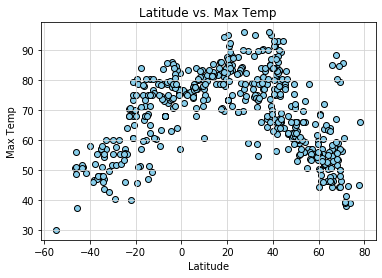

In [10]:
plt.scatter(Latitudes, Max_Temp, edgecolors="black",facecolors="skyblue")
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

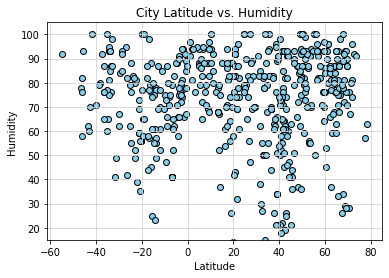

In [11]:
plt.scatter(Latitudes, Humidity, edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

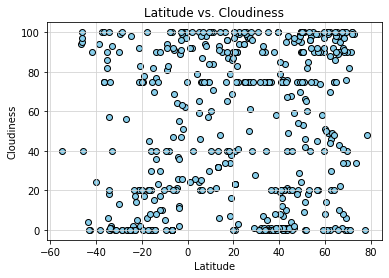

In [12]:
plt.scatter(Latitudes, Cloudiness, edgecolors="black",facecolors="skyblue")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

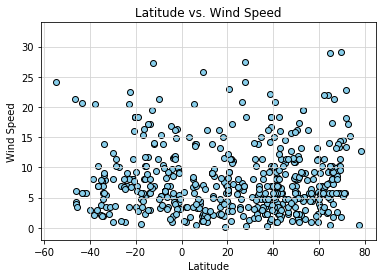

In [13]:
plt.scatter(Latitudes, Wind_Speed,edgecolors="black",facecolors="skyblue")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

def plot_linear_regress(x_values,y_values,x_label,y_label,hemisphere,filename,x_annote,y_annote):
    # Print out the r-squared value along with the plot.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere}-\nCity {x_label} vs. {y_label}")
    plt.annotate(line_eq,(x_annote,y_annote),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
    print(line_eq)
    plt.savefig(f'Figures/{filename}')
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem = city_data.Lat >= 0
southern_hem = city_data.Lat < 0

northern_weather = city_data[northern_hem]
southern_weather = city_data[southern_hem]

northern_weather = northern_weather.reset_index(drop=True)
southern_weather = southern_weather.reset_index(drop=True)

northern_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,jamestown,1,US,1595722676,64,42.10,-79.24,75.20,8.05
1,goderich,98,CA,1595722888,60,43.75,-81.72,78.01,4.00
2,manzhouli,95,CN,1595722888,75,49.60,117.43,71.76,10.80
3,puerto ayora,0,ES,1595722889,69,36.59,-6.23,80.01,2.24
4,punta arenas,57,PH,1595722889,69,8.99,125.34,83.48,1.99


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6714417447180292
y = -0.46x + 89.19


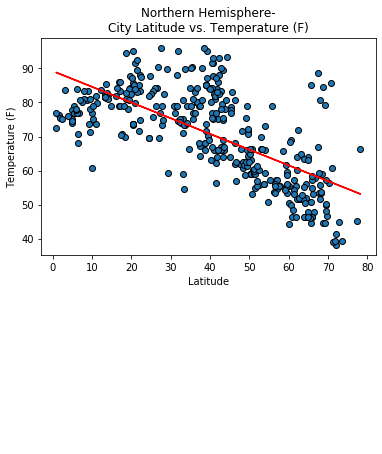

In [16]:
plot_linear_regress(northern_weather["Lat"],northern_weather["Max Temp"],\
                  'Latitude','Temperature (F)','Northern Hemisphere',\
                 'NHem_LATvTEMP.png',6,-20)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7698946225260409
y = 0.74x + 78.98


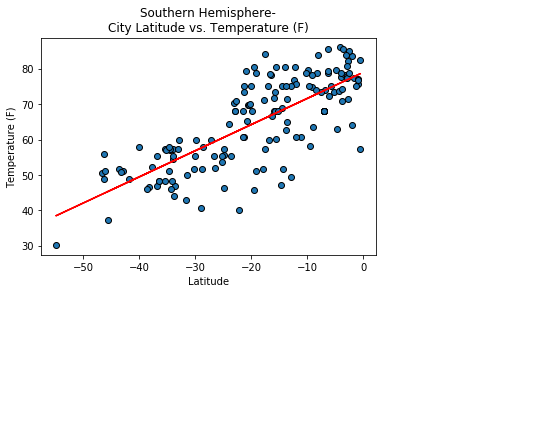

In [17]:
plot_linear_regress(southern_weather["Lat"],southern_weather["Max Temp"],\
                  'Latitude','Temperature (F)','Southern Hemisphere',\
                 'SHem_LATvTEMP.png',6,-20)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.017735957937032695
y = -0.02x + 74.02


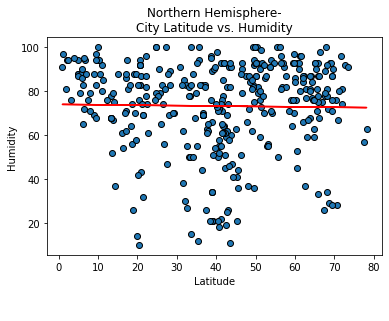

In [18]:
plot_linear_regress(northern_weather["Lat"],northern_weather["Humidity"],\
                  'Latitude','Humidity','Northern Hemisphere',\
                 'NHem_LATvHUM.png',6,-20)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.17272935673011
y = -0.22x + 67.19


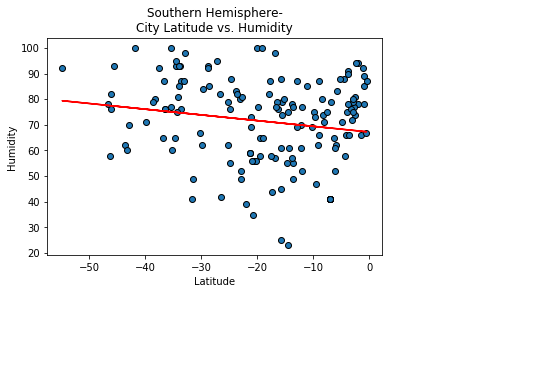

In [19]:
plot_linear_regress(southern_weather["Lat"],southern_weather["Humidity"],\
                  'Latitude','Humidity','Southern Hemisphere',\
                 'SHem_LATvHUM.png',6,-20)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.010780602255953415
y = -0.02x + 53.78


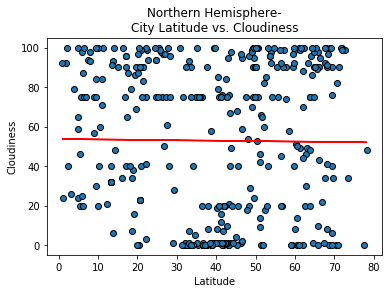

In [20]:
plot_linear_regress(northern_weather["Lat"],northern_weather["Cloudiness"],\
                  'Latitude','Cloudiness','Northern Hemisphere',\
                 'NHem_LATvCLOUDY.png',6,-20)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04636419621591762
y = 0.14x + 46.29


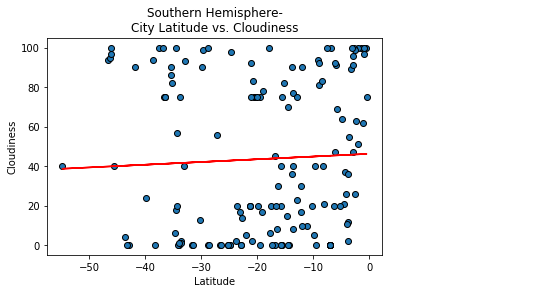

In [21]:
plot_linear_regress(southern_weather["Lat"],southern_weather["Cloudiness"],\
                  'Latitude','Cloudiness','Southern Hemisphere',\
                 'SHem_LATvCLOUDY.png',6,-20)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.13653364250478714
y = 0.04x + 6.05


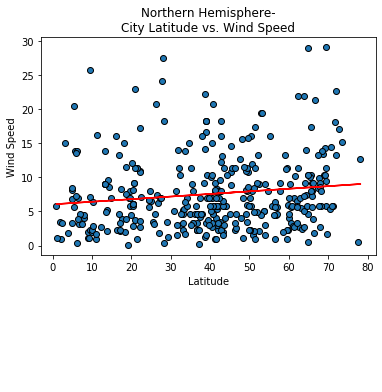

In [22]:
plot_linear_regress(northern_weather["Lat"],northern_weather["Wind Speed"],\
                  'Latitude','Wind Speed','Northern Hemisphere',\
                 'NHem_LATvWIND.png',6,-20)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.007663839765734168
y = -0.0x + 8.21


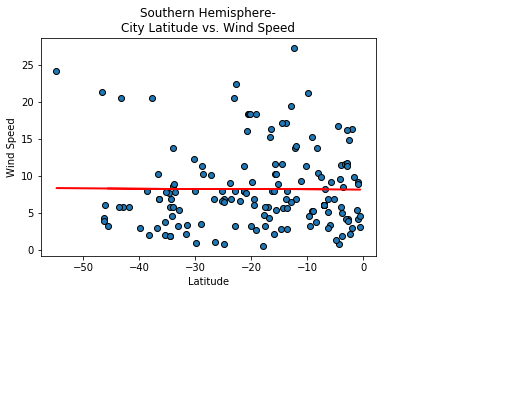

In [23]:
plot_linear_regress(southern_weather["Lat"],southern_weather["Wind Speed"],\
                  'Latitude','Wind Speed','Southern Hemisphere',\
                 'SHem_LATvWIND.png',6,-20)